<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/paziewski/PUM_Projekt_NY_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Podstawy Uczenia Maszynowego*
# **Projekt - Przewidywanie cen nieruchomości**!
na podstawie danych pochodzących z
https://github.com/UEPP40/PUM/blob/c53e3d892647a9194c333075c41e7e7c51ce8586/NY-House-Dataset.csv



*Jan Mańczak, Mikołaj Paziewski, Andrii Yarosh*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Polecenie:
Celem jest predykcja ceny nieruchomości.

Zbiór danych zawiera 4802 instancje i kolumny określające:

BROKERTITLE: Title of the broker
TYPE: Type of the house
PRICE: Price of the house
BEDS: Number of bedrooms
BATH: Number of bathrooms
PROPERTYSQFT: Square footage of the property
ADDRESS: Full address of the house
STATE: State of the house
MAIN_ADDRESS: Main address information
ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
LOCALITY: Locality information
SUBLOCALITY: Sublocality information
STREET_NAME: Street name
LONG_NAME: Long name
FORMATTED_ADDRESS: Formatted address
LATITUDE: Latitude coordinate of the house
LONGITUDE: Longitude coordinate of the house

#1. Wczytanie pliku
należy zadbać o to, aby wpierw pobrać nasz plik i umieścić w środowisku wykonawczym.
Plik wczytamy za pomocą biblioteki pandas, dlatego też od razu ją zaimportujemy

Dane są popsute i nawet nie jesteśmy w stanie ich wczytać.
Problem leży w liniach, które są źle zapisane i się wysypują.
Spróbujemy po prostu je ominąć, za pomocą poniższego kodu:

In [ ]:
# Ponowne wczytanie pliku CSV z użyciem średnika jako separatora i odpowiednią obsługą błędnych linii (tylko jeden wiersz)
df = pd.read_csv('sample_data/NY-House-Dataset.csv', sep=';', on_bad_lines='skip')

# Wyświetlenie pierwszych kilku wierszy DataFrame
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Teraz dane zostały poprawnie wczytane do DataFrame z właściwym rozdzieleniem kolumn. Oto kilka pierwszych wierszy z wczytanego zbioru danych:

* BROKERTITLE: Tytuł brokera, np. "Brokered by Douglas Elliman -111 Fifth Ave".
* TYPE: Typ nieruchomości, np. "Condo for sale".
* PRICE: Cena nieruchomości, np. 315000.
* BEDS: Liczba sypialni, np. 2.
* BATH: Liczba łazienek, np. 2.0.
* PROPERTYSQFT: Powierzchnia nieruchomości w stopach kwadratowych, np. 1400.0.
* ADDRESS: Pełny adres nieruchomości, np. "2 E 55th St Unit 803".
* STATE: Stan w jakim znajduje się nieruchomość, np. "New York, NY 10022".
* MAIN_ADDRESS, ADMINISTRATIVE_AREA_LEVEL_2, LOCALITY, SUBLOCALITY, STREET_NAME, LONG_NAME, FORMATTED_ADDRESS: Różne szczegóły adresowe i lokalizacyjne.
* LATITUDE i LONGITUDE: Współrzędne geograficzne nieruchomości.

# 2. Sprawdzenie typów danych kolumn

In [ ]:
# Sprawdzenie typów danych dla każdej kolumny w DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

Typy danych wydają się być odpowiednie dla większości kolumn. Kolumny tekstowe są oznaczone jako object, co jest typowe dla danych tekstowych w pandas. Kolumny z danymi numerycznymi (PRICE, BEDS, BATH, PROPERTYSQFT, LATITUDE, LONGITUDE) mają typy liczbowe, co jest oczekiwane.

#3. Sprawdzenie, czy zawartości kolumn faktycznie odpowiadają typom danych kolumn

najpierw sprawdzimy czy dane numeryczne wyglądają w porządku, a potem tekstowe.

In [ ]:
# Odrzucanie kolumn nieprzydatnych w procesie uczenia maszynowego
selected_columns = [ 'TYPE' , 'PRICE' , 'BEDS' , 'BATH' , 'PROPERTYSQFT' , 'LATITUDE' , 'LONGITUDE' ]
df_selected = df[selected_columns]
df_selected.info()
df_selected.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          4801 non-null   object 
 1   PRICE         4801 non-null   int64  
 2   BEDS          4801 non-null   int64  
 3   BATH          4801 non-null   float64
 4   PROPERTYSQFT  4801 non-null   float64
 5   LATITUDE      4801 non-null   float64
 6   LONGITUDE     4801 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 262.7+ KB


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [ ]:
df_selected.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,40.767224,-73.969856


Analiza Kolumn Numerycznych
Podstawowe statystyki dla kolumn numerycznych przedstawiają się następująco:

* PRICE: Średnia cena wynosi około 2.356.940 USD, ale standardowe odchylenie jest bardzo wysokie (około 31.355.250 USD), sugerując dużą rozpiętość cen. Minimalna cena to 2.494 USD, a maksymalna to aż 2.147.484.000 USD, co może wskazywać na obecność wartości odstających.
* BEDS: Średnia liczba sypialni to około 3.36, z minimalną wartością 1 i maksymalną 50. Rozkład wydaje się być w miarę spodziewany, choć wartość maksymalna może być wartością odstającą.
* BATH: Średnia liczba łazienek to około 2.37, co jest spójne z oczekiwaniami dla nieruchomości. Minimalna wartość to 0 (co może wskazywać na brak informacji o łazienkach w niektórych przypadkach), a maksymalna to 50, co znowu może być wartością odstającą.
* PROPERTYSQFT: Średnia powierzchnia to około 2.184 stóp kwadratowych. Minimalna powierzchnia to 230 stóp kwadratowych, a maksymalna to 65.535 stóp kwadratowych, co również sugeruje obecność wartości ekstremalnych.
* LATITUDE i LONGITUDE: Średnie współrzędne geograficzne wydają się być rozsądne dla obszaru Nowego Jorku, z minimalnymi i maksymalnymi wartościami w spodziewanych zakresach.

#4. Znalezienie wartości odstających i nierealistycznych


In [ ]:
#Usuwamy wiersze, które przyjmują w niektórych kolumnach przeciętne wartości

print("Początkowa liczba wierszy w data frame                     | " + str(df_selected.shape[0]))

original_rows = df_selected.shape[0]
df_cleaned = df_selected[df_selected['BATH'] != 2.3738608579684373]
print("Usuwanie wierszy z niestandardową wielkością BATH          | -" + str(original_rows - df_cleaned.shape[0]))

original_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['PROPERTYSQFT'] != 2184.207862]
print("Usuwanie wierszy z niestandardową wielkością PROPERTYSQFT  | -" +  str(original_rows - df_cleaned.shape[0]))

print("Obecna liczba wierszy w data frame                         | " + str(df_cleaned.shape[0]))

Początkowa liczba wierszy w data frame                     | 4801
Usuwanie wierszy z niestandardową wielkością BATH          | -302
Usuwanie wierszy z niestandardową wielkością PROPERTYSQFT  | -1495
Obecna liczba wierszy w data frame                         | 3004


In [ ]:
print("Początkowa liczba wierszy w data frame                     | " + str(df_cleaned.shape[0]))

# Usuwamy wiersze, które przyjmują odstające wartości w PRICE
original_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[(df_cleaned['PRICE'] <= 195000000) & (df_cleaned['PRICE'] >= 60000)]
print("Usuwanie odstających wartości w PRICE                      | -" + str(original_rows - df_cleaned.shape[0]))

# Usuwamy wiersze, które przyjmują odstające wartości w BATH
original_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['BATH'] <= 20]
print("Usuwanie odstających wartości w BATH                       | -" + str(original_rows - df_cleaned.shape[0]))

# Usuwamy wiersze, które przyjmują odstające wartości w BEDS
original_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['BEDS'] <= 30]
print("Usuwanie odstających wartości w BEDS                       | -" + str(original_rows - df_cleaned.shape[0]))

# Usuwamy wiersze, które przyjmują odstające wartości w PROPERTYSQFT
original_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['PROPERTYSQFT'] <= 50000]
print("Usuwanie odstających wartości w PROPERTYSQFT               | -" + str(original_rows - df_cleaned.shape[0]))

print("Obecna liczba wierszy w data frame                         | " + str(df_cleaned.shape[0]))


Początkowa liczba wierszy w data frame                     | 3004
Usuwanie odstających wartości w PRICE                      | -1
Usuwanie odstających wartości w BATH                       | -4
Usuwanie odstających wartości w BEDS                       | -5
Usuwanie odstających wartości w PROPERTYSQFT               | -0
Obecna liczba wierszy w data frame                         | 2994


#Wyświetlenie nieruchomości na mapie:

In [ ]:
import folium

# Stwórz mapę z początkową lokalizacją (średnia wartość szerokości i długości geograficznej twoich danych)
m = folium.Map(location=[df_cleaned['LATITUDE'].mean(), df_cleaned['LONGITUDE'].mean()], zoom_start=10)

# Dodaj punkty dla każdej nieruchomości
for idx, row in df_cleaned.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Type: {row['TYPE']}<br>Price: ${row['PRICE']}<br>Beds: {row['BEDS']}<br>Baths: {row['BATH']}<br>SqFt: {row['PROPERTYSQFT']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Wyświetl mapę
m.save('NY_House_Map.html')


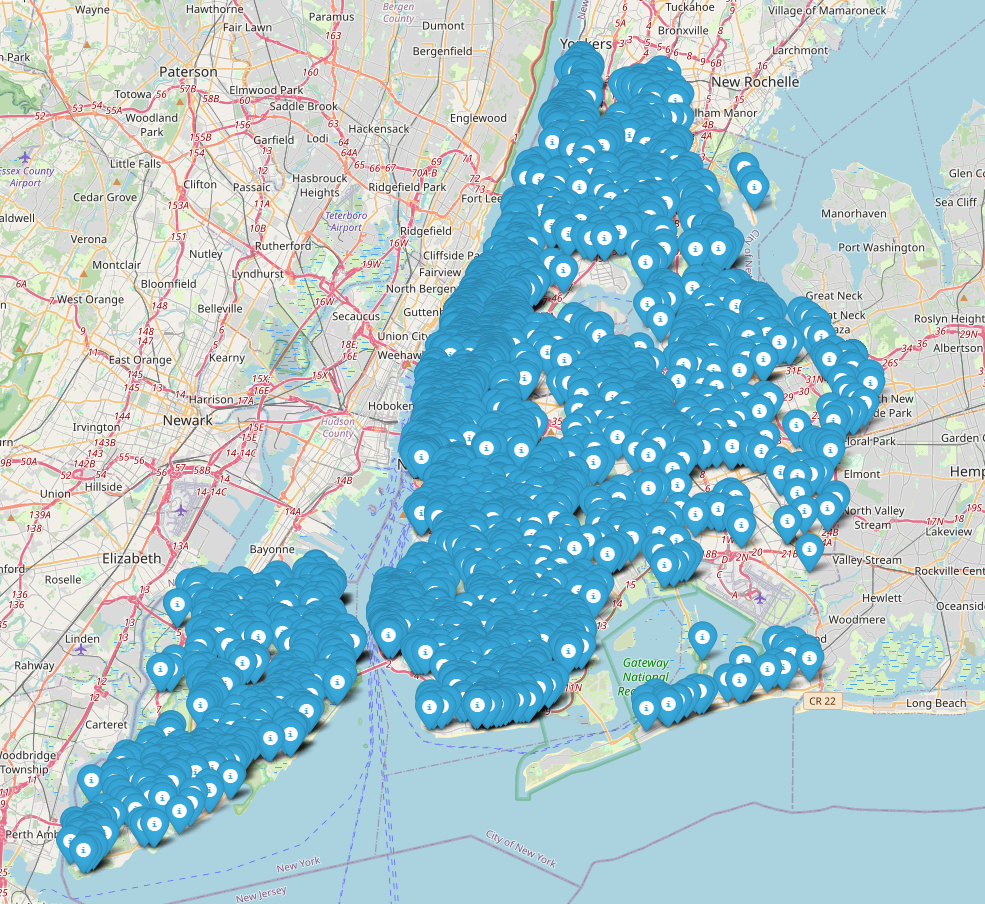

#Macierz korelacji

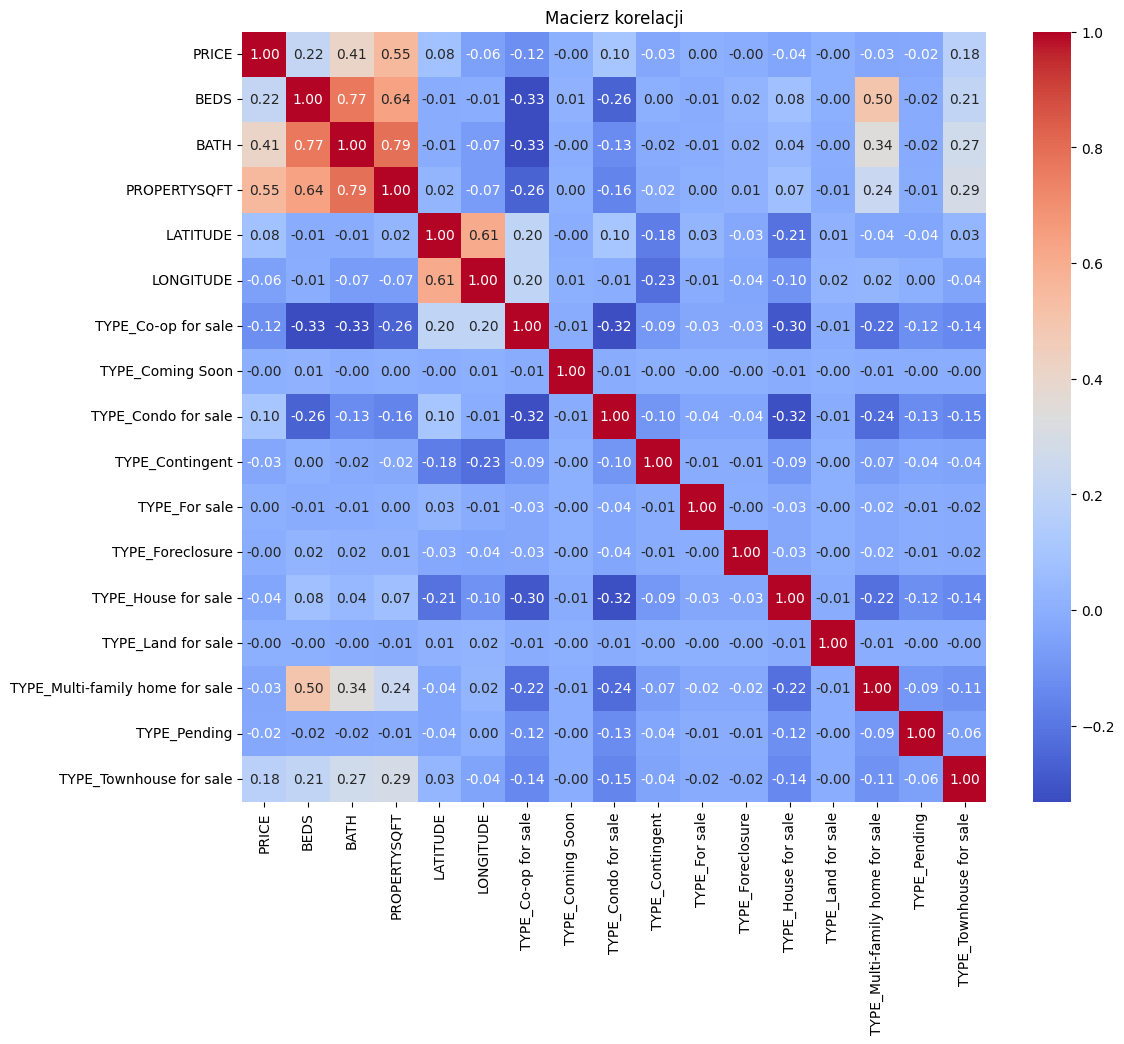

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kodowanie zmiennej 'TYPE' i przygotowanie danych
df_encoded = pd.get_dummies(df_cleaned, columns=['TYPE'])

# Obliczanie macierzy korelacji
correlation_matrix = df_encoded.corr()

# Tworzenie heatmapy
plt.figure(figsize=(12, 10))  # Możesz dostosować rozmiar wykresu do swoich potrzeb
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Macierz korelacji')
plt.show()


In [ ]:
#zapisanie
df_encoded.to_csv("ourModified_NY_House.csv")

#Decyzja: wyrzucenie kolumn z korelacją <0.1

In [ ]:
# Kolumny do usunięcia, które mają korelację z 'PRICE' mniejszą niż 0.1
columns_to_drop = correlation_matrix.index[correlation_matrix['PRICE'].abs() < 0.0]

# Usunięcie tych kolumn z DataFrame
df_reduced = df_encoded.drop(columns=columns_to_drop)

# Wyświetlenie pierwszych kilku wierszy nowego DataFrame bez kolumn o niskiej korelacji
print(df_reduced.head())

# Sprawdzenie kolumn pozostałych w DataFrame
print("Kolumny pozostałe w DataFrame:", df_reduced.columns)

       PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  \
0     315000     2   2.0        1400.0  40.761255 -73.974483   
1  195000000     7  10.0       17545.0  40.766393 -73.980991   
2     260000     4   2.0        2015.0  40.541805 -74.196109   
3      69000     3   1.0         445.0  40.761398 -73.974613   
5     690000     5   2.0        4004.0  40.674363 -73.958725   

   TYPE_Co-op for sale  TYPE_Coming Soon  TYPE_Condo for sale  \
0                False             False                 True   
1                False             False                 True   
2                False             False                False   
3                False             False                 True   
5                False             False                False   

   TYPE_Contingent  TYPE_For sale  TYPE_Foreclosure  TYPE_House for sale  \
0            False          False             False                False   
1            False          False             False                False

#Standaryzacja zmiennych

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selekcja kolumn numerycznych, które będą standaryzowane
numeric_cols = ['PRICE', 'PROPERTYSQFT', 'BATH', 'BEDS']

# Inicjalizacja skalera
scaler = StandardScaler()
# MinMaxScaler() daje gorsze wyniki
#scaler = MinMaxScaler()

# Standaryzacja wybranych kolumn
df_reduced[numeric_cols] = scaler.fit_transform(df_reduced[numeric_cols])

# Podział danych na zestaw treningowy i testowy
train_df, test_df = train_test_split(df_reduced, test_size=0.3, random_state=42)  # 70% trening, 30% test

# Wyświetlenie informacji o podziale
print(f'Liczba wierszy w zestawie treningowym: {train_df.shape[0]}')
print(f'Liczba wierszy w zestawie testowym: {test_df.shape[0]}')

df_reduced.head()


Liczba wierszy w zestawie treningowym: 2095
Liczba wierszy w zestawie testowym: 899


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Contingent,TYPE_For sale,TYPE_Foreclosure,TYPE_House for sale,TYPE_Land for sale,TYPE_Multi-family home for sale,TYPE_Pending,TYPE_Townhouse for sale
0,-0.310746,-0.589575,-0.258455,-0.304113,40.761255,-73.974483,False,False,True,False,False,False,False,False,False,False,False
1,37.897192,1.609763,4.438442,8.319713,40.766393,-73.980991,False,False,True,False,False,False,False,False,False,False,False
2,-0.321540,0.290160,-0.258455,0.024388,40.541805,-74.196109,False,False,False,False,False,False,True,False,False,False,False
3,-0.359024,-0.149708,-0.845567,-0.814225,40.761398,-73.974613,False,False,True,False,False,False,False,False,False,False,False
5,-0.237150,0.730027,-0.258455,1.086809,40.674363,-73.958725,False,False,False,False,False,False,True,False,False,False,False


# Tworzenie modeli:

1. Regresja liniowa

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Utworzenie instancji modelu
model = LinearRegression()

# Trenowanie modelu na zestawie treningowym
model.fit(train_df.drop('PRICE', axis=1), train_df['PRICE'])

# Predykcja na zestawie testowym
predictions = model.predict(test_df.drop('PRICE', axis=1))

# Ocena modelu
mse = mean_squared_error(test_df['PRICE'], predictions)
r2 = r2_score(test_df['PRICE'], predictions)

print(f'MSE: {mse}')
print(f'R^2: {r2}')


MSE: 0.24478963161499778
R^2: 0.5471536488996588


*2*. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Utworzenie instancji modelu Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu na zestawie treningowym
forest_model.fit(train_df.drop('PRICE', axis=1), train_df['PRICE'])

# Predykcja na zestawie testowym
forest_predictions = forest_model.predict(test_df.drop('PRICE', axis=1))

# Ocena modelu
forest_mse = mean_squared_error(test_df['PRICE'], forest_predictions)
forest_r2 = r2_score(test_df['PRICE'], forest_predictions)

print(f'MSE (Random Forest): {forest_mse}')
print(f'R^2 (Random Forest): {forest_r2}')


MSE (Random Forest): 0.11552103597511211
R^2 (Random Forest): 0.7862929108903662


2b. Sprawdzenie z walidacją krzyżową

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Utworzenie instancji modelu Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Definicja danych wejściowych i wyjściowych
X = df_reduced.drop('PRICE', axis=1)
y = df_reduced['PRICE']

# Przeprowadzenie walidacji krzyżowej z 5 podziałami
# 'neg_mean_squared_error' zwróci wartości MSE jako liczby ujemne, więc użyjemy -score, aby uzyskać wartości dodatnie
mse_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Konwersja na dodatnie wartości MSE

# Obliczenie średniej MSE
average_mse = mse_scores.mean()

# Przeprowadzenie walidacji krzyżowej dla metryki R^2
r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Obliczenie średniej wartości R^2
average_r2 = r2_scores.mean()

print(f'Średnie MSE z walidacji krzyżowej: {average_mse}')
print(f'Średnie R^2 z walidacji krzyżowej: {average_r2}')


Średnie MSE z walidacji krzyżowej: 0.5753860783529479
Średnie R^2 z walidacji krzyżowej: 0.5550951552425759


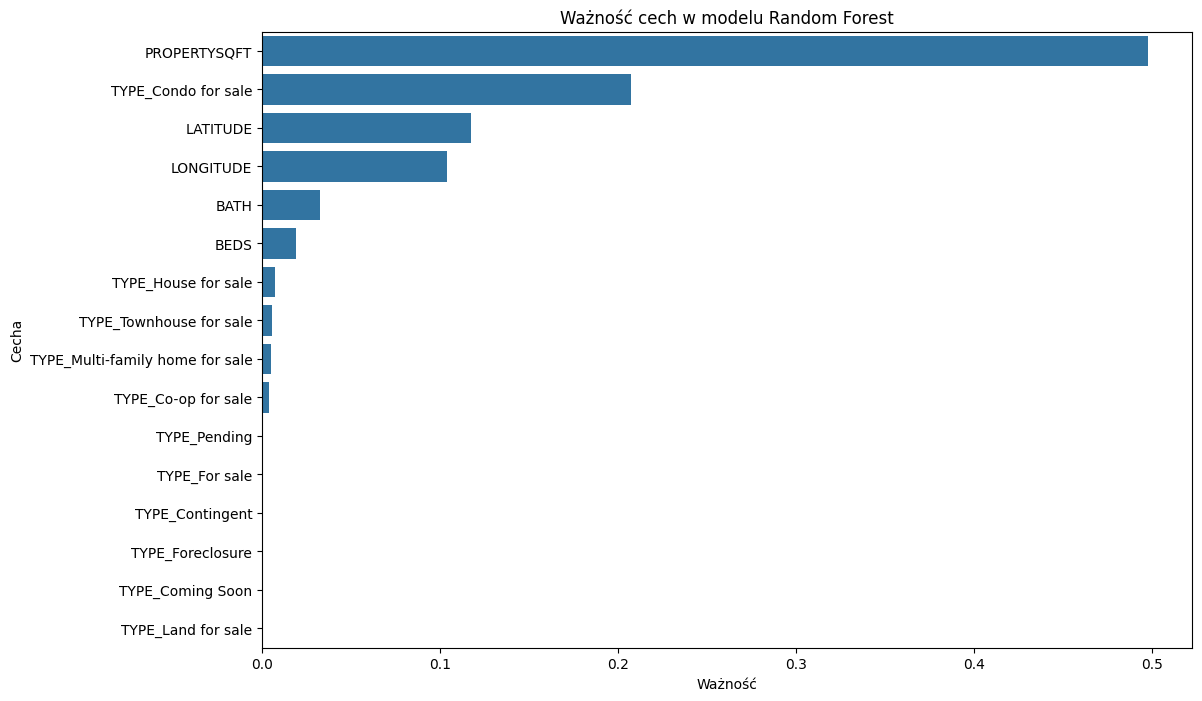

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Trenowanie modelu
rf = RandomForestRegressor(n_estimators=100, random_state=42)
X = df_reduced.drop('PRICE', axis=1)
y = df_reduced['PRICE']
rf.fit(X, y)

# Pobranie ważności cech
feature_importances = rf.feature_importances_
features = X.columns

# Utworzenie DataFrame dla lepszej wizualizacji
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sortowanie cech według ważności
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Wizualizacja ważności cech
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Ważność cech w modelu Random Forest')
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.show()


# Metoda najbliższych sąsiadów z walidacją krzyżową

1 wariant - obliczamy k dla zbioru treningowego

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Zakładając, że df_reduced jest już przygotowany

# Przygotowanie danych
X = df_reduced.drop('PRICE', axis=1)
y = df_reduced['PRICE']

# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standaryzacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Utworzenie instancji modelu KNN
knn_model = KNeighborsRegressor()

# Przeszukiwanie siatki parametrów w celu znalezienia optymalnej liczby sąsiadów
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Najlepszy parametr k
best_k = grid_search.best_params_['n_neighbors']
print(f'Najlepsza liczba sąsiadów: {best_k}')

# Utworzenie modelu z optymalną liczbą sąsiadów
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predykcja na zestawie testowym
knn_predictions = knn_model.predict(X_test_scaled)

# Ocena modelu
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print(f'MSE (KNN): {knn_mse}')
print(f'R^2 (KNN): {knn_r2}')


Najlepsza liczba sąsiadów: 2
MSE (KNN): 0.14862419906048338
R^2 (KNN): 0.7250540156226655


In [ ]:
from sklearn.model_selection import cross_val_score

# Definicja danych wejściowych i wyjściowych
X = df_reduced.drop('PRICE', axis=1)
y = df_reduced['PRICE']

# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utworzenie instancji modelu KNN z najlepszym k
knn_model = KNeighborsRegressor(n_neighbors=best_k)

# Przeprowadzenie walidacji krzyżowej z 5 podziałami dla metryki MSE
knn_mse_scores = cross_val_score(knn_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
knn_mse_scores = -knn_mse_scores  # Konwersja na dodatnie wartości MSE

# Obliczenie średniej MSE
knn_average_mse = knn_mse_scores.mean()

# Przeprowadzenie walidacji krzyżowej dla metryki R²
knn_r2_scores = cross_val_score(knn_model, X_scaled, y, cv=5, scoring='r2')

# Obliczenie średniej wartości R²
knn_average_r2 = knn_r2_scores.mean()

print(f'Średnie MSE z walidacji krzyżowej (KNN): {knn_average_mse}')
print(f'Średnie R² z walidacji krzyżowej (KNN): {knn_average_r2}')

Średnie MSE z walidacji krzyżowej (KNN): 0.695425376189607
Średnie R² z walidacji krzyżowej (KNN): 0.32150583437380914


2 wariant - obliczamy k dla wszystkich danych, przed podziałem na zbiór treningowy i testowy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

#zapisanie, żeby mieć backup zmodyfikowanych przez nas danych.
df_reduced.to_csv("ourModified30_05.csv")

# Przygotowanie danych
X = df_reduced.drop('PRICE', axis=1)
y = df_reduced['PRICE']

# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utworzenie instancji modelu KNN
knn_model = KNeighborsRegressor()

# Przeszukiwanie siatki parametrów w celu znalezienia optymalnej liczby sąsiadów
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)

# Najlepszy parametr k
best_k = grid_search.best_params_['n_neighbors']
print(f'Najlepsza liczba sąsiadów: {best_k}')

# Utworzenie modelu z optymalną liczbą sąsiadów
knn_model = KNeighborsRegressor(n_neighbors=best_k)

# Walidacja krzyżowa z 5-cioma przekrojami
cv_scores = cross_val_score(knn_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

print(f'Średni MSE (walidacja krzyżowa): {mean_cv_score}')
print(f'Std MSE (walidacja krzyżowa): {std_cv_score}')

# Podział na zestaw treningowy i testowy do ostatecznej oceny modelu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trenowanie modelu na pełnym zestawie treningowym
knn_model.fit(X_train_scaled, y_train)

# Predykcja na zestawie testowym
knn_predictions = knn_model.predict(X_test_scaled)

# Ocena modelu
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print(f'MSE (KNN): {knn_mse}')
print(f'R^2 (KNN): {knn_r2}')


Najlepsza liczba sąsiadów: 16
Średni MSE (walidacja krzyżowa): 0.6216597773878605
Std MSE (walidacja krzyżowa): 0.9249730338280582
MSE (KNN): 0.19371999845722251
R^2 (KNN): 0.6416294519594261


#Podsumowując:
*Wszystkie wyniki uwzględniają walidację krzyżową - unikamy overfittingu.*


## Pierwszy model: Regresja
MSE: 0.24478963161499778<br>
R^2: 0.5471536488996588<br>

## Drugi model: Drzewa losowe
MSE (Random Forest): 0.11552103597511211<br>
R^2 (Random Forest): 0.7862929108903662<br>
Średnie MSE z walidacji krzyżowej: 0.5753860783529479<br>
Średnie R^2 z walidacji krzyżowej: 0.5550951552425759<br>

## Trzeci model: Metoda najbliższych sąsiadów:
a)
Najlepsza liczba sąsiadów: 2<br>
MSE (KNN): 0.14862419906048338<br>
R^2 (KNN): 0.7250540156226655<br>
Średnie MSE z walidacji krzyżowej (KNN): 0.695425376189607<br>
Średnie R² z walidacji krzyżowej (KNN): 0.32150583437380914<br>
<br>
b)
Najlepsza liczba sąsiadów: 16<br>
MSE (KNN): 0.19371999845722251<br>
R^2 (KNN): 0.6416294519594261<br>
Średni MSE (walidacja krzyżowa): 0.6216597773878605<br>
Std MSE (walidacja krzyżowa): 0.9249730338280582<br>





Random Forest jest najlepszym modelem, ponieważ:


*   Ma najniższe MSE i najwyższe R² na zestawie testowym, co wskazuje na wysoką dokładność predykcji.
*   Ma najniższe średnie MSE i najwyższe średnie R² w walidacji krzyżowej, co sugeruje, że model jest stabilny i dobrze generalizuje na nowe dane.





